In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
csv_path = [
   "../../Raw_CSV/April 25-26 - 2022/Upwork/Upwork_Game_Designer.csv",
   "../../Raw_CSV/April 27 - 2022/Upwork/Upwork-Game-Designer.csv",
    "../../Raw_CSV/April 28 - 2022/Upwork/Freelance Game Designer Jobs - Upwork.csv", 
]
merge = pd.concat(map(pd.read_csv,csv_path),ignore_index=True)
merge["Skill"]= merge["Skill"].str.replace("^\['|'\]$","")
merge

/var/folders/tc/qdg72rpx523gjsqcr2vf_0c00000gn/T/ipykernel_3970/1731200986.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  merge["Skill"]= merge["Skill"].str.replace("^\['|'\]$","")


,Title,Description,Location,Skill,Est.Proj-Budget,Job Type,Contractor Tier,Duration,Title_URL,Job_type,...,Skill_two,skill_three,skill_four,skill_five,skill_six,skill_seven,skill_eight,skill_none,skill_ten,skill_eleven
0,Expert in gaming - with a proven track record ...,"If you have a great resume behind you, and you...",None,"Mobile Game', 'Game', 'Game Development', 'Cry...",None,Hourly,Expert,"1 to 3 months, Less than 30 hrs/week",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Create and manage game design and economy syst...,We are looking out for a freelance Game Design...,None,"Game Design', 'Game Design Document', 'Game De...","\n $1,200\n",Fixed-price,Intermediate,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Multiplayer PVP third person shooter (team mat...,- Make a PVP type multiplayer shooting game- h...,None,Unity,None,Hourly,Intermediate,"Less than 1 month, Less than 30 hrs/week",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Unity project/ Using API to upload products to...,Hi I have created a unity game; its on metaver...,None,"PHP', 'Unity', 'WordPress",\n $200\n,Fixed-price,Expert,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Create an addictive video game in mobile,"Hello,I want to create a video game in which p...",None,"Game Design', 'Game Development', 'Graphic Des...",None,Hourly: $15.00-$50.00,Expert,"1 to 3 months, Less than 30 hrs/week",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,2D/3D Game Concept Artist that has an out of t...,We are building the next gen MMO game title an...,NaN,NaN,NaN,NaN,NaN,"More than 6 months, Less than 30 hrs/week",https://www.upwork.com/job/Game-Concept-Artist...,Hourly,...,Graphic Design,Character Design,Illustration,Concept Artistry,Digital Illustration,Digital Art,NaN,NaN,NaN,NaN
466,Concept Artist for upcoming african themed game,We have recently started work on our african t...,NaN,NaN,NaN,NaN,NaN,"1 to 3 months, Less than 30 hrs/week",https://www.upwork.com/job/Concept-Artist-for-...,Hourly: $20.00-$30.00,...,Character Design,Game Asset,2D Game Art,3D Game Art,3D Texturing,Lighting,Concept Artistry,Illustration,NaN,NaN
467,3D Low Poly Mobile Game Art,I am looking to create an idle college sports ...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.upwork.com/job/Low-Poly-Mobile-Gam...,Fixed-price,...,Game Asset,3D Game Art,3D Design,Character Design,Animation,3D Texturing,Lighting,Low Poly,Cartoon Art,3D Modeling
468,Pixel Artist needed for a fantasy RPG game,Hello we are a small group of friends new into...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.upwork.com/job/Pixel-Artist-needed...,Fixed-price,...,Game Design,Character Design,2D Animation,Pixel Art,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
merge["Est.Proj-Budget"] = merge["Est.Proj-Budget"].str.strip()

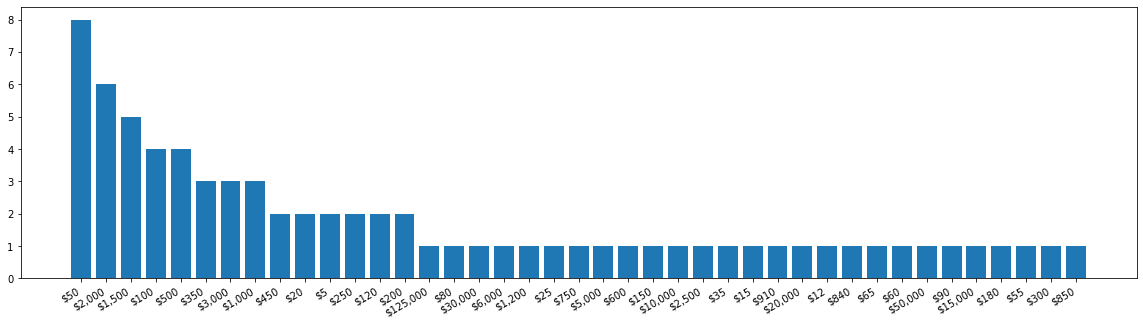

In [4]:
filt = (merge["Est.Proj-Budget"] != "None") & (merge["Est.Proj-Budget"].notna())
filter_est = merge.loc[filt]
count_est = filter_est["Est.Proj-Budget"].value_counts()
plt.figure(figsize=(20, 5))
plt.bar(count_est.index, count_est.values)
plt.xticks(rotation=30, ha="right")
plt.show()



In [5]:
filt_first_tier = merge["Contractor_tier"].fillna("")
# frame_first_tier =  merge.loc[filt_first_tier,"Contractor_tier"]
filt_second_tier = merge["Contractor Tier"].fillna("")
# frame_second_tier = merge.loc[filt_second_tier,"Contractor Tier"]

merge["CT"] = filt_first_tier + filt_second_tier


In [6]:
merge["CT"] = merge["CT"].str.strip()

In [7]:
count_tier = merge["CT"].value_counts()
count_tier

Intermediate    227
Expert          186
Entry level      57
Name: CT, dtype: int64

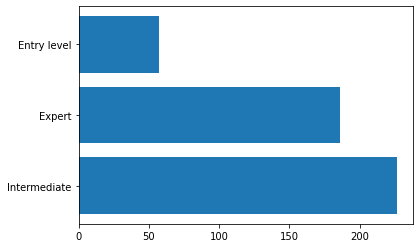

In [8]:
plt.barh(count_tier.index,count_tier.values)
plt.show()

In [9]:
merge["Combine Skills"] =   merge.Skill.fillna("") + " " + merge.Skill_one.fillna("") + "," + merge.Skill_two.fillna(",") + ", " + merge.skill_four.fillna(",") + ", " + merge.skill_three.fillna(",")

In [10]:
merge["Combine Skills"] = merge["Combine Skills"].str.replace("'", "")

In [11]:
merge["Combine Skills"] = merge["Combine Skills"].str.split(",")

In [12]:
skill_append = []
for i in range(len(merge["Combine Skills"])):
    count = merge["Combine Skills"][i]
    for j in range(len(count)):
        skill_append.append(count[j])

In [13]:
skill_without_space = []
filter_skill = list(filter(None, skill_append))
for i in filter_skill:
    if i != " ":
        skill_without_space.append(i)

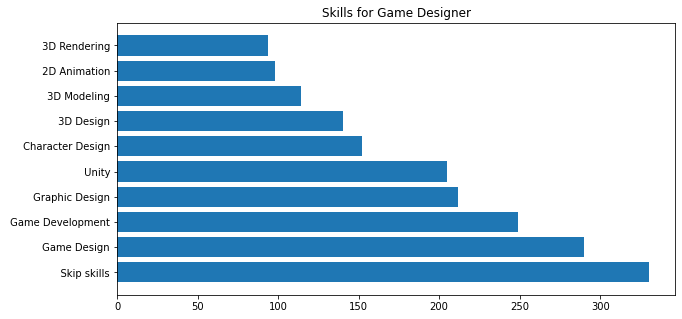

In [22]:
skill_frame = pd.DataFrame(skill_without_space, columns={"Skill"})
count_skill = skill_frame["Skill"].value_counts()[0:10]
plt.figure(figsize=(10,5))
plt.title("Skills for Game Designer")
plt.barh(count_skill.index,count_skill.values)
plt.show()

In [15]:
merge["JT"] = merge["Job Type"].fillna("") + merge["Job_type"].fillna("")

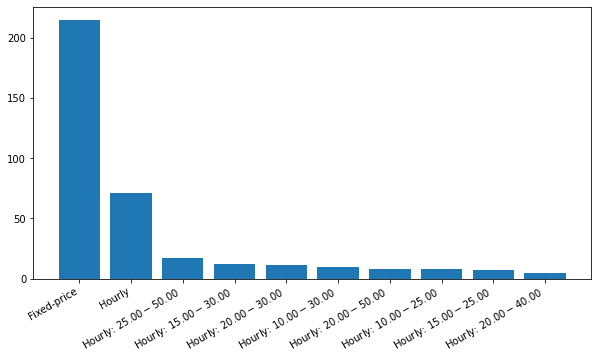

In [16]:
count_jt = merge["JT"].value_counts()[0:10]
plt.figure(figsize=(10,5))
plt.bar(count_jt.index, count_jt.values)
plt.xticks(rotation="30",ha="right")
plt.show()


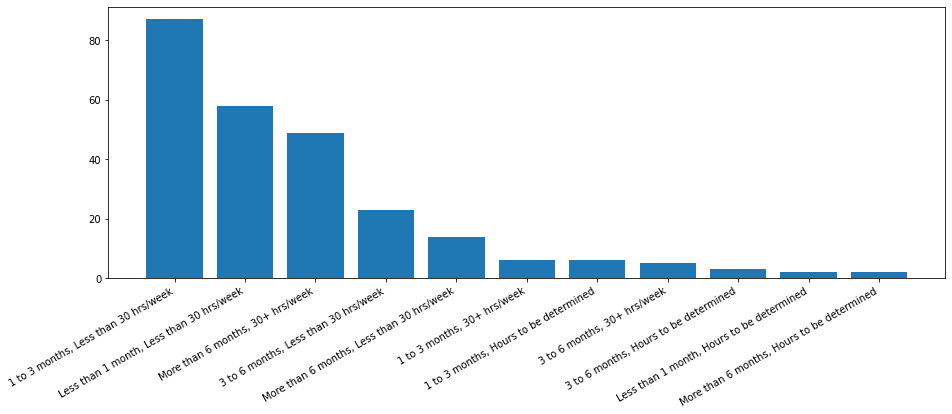

In [17]:
filt_loc = (merge["Duration"] != "None")
merge_duration = merge.loc[filt_loc,"Duration"]
count_duration = merge_duration.value_counts()
plt.figure(figsize=(15,5))
plt.bar(count_duration.index, count_duration.values)
plt.xticks(rotation="30",ha="right")
plt.show()

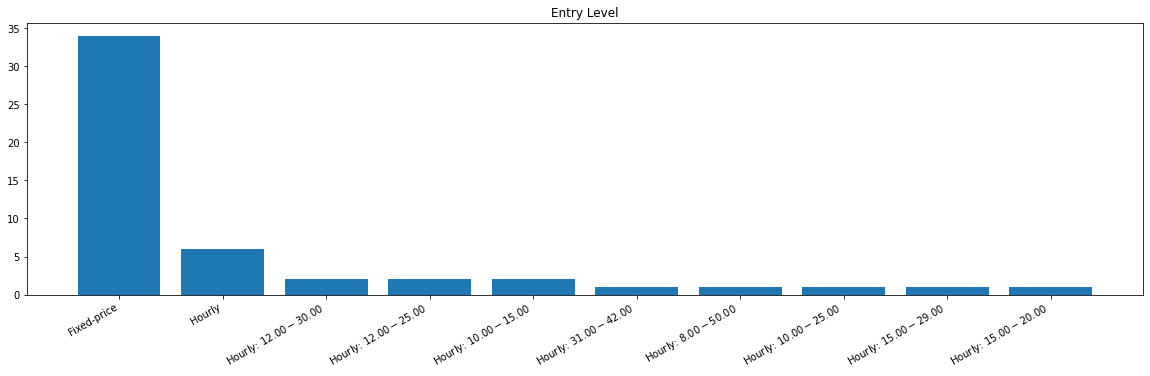

In [18]:
filt = (merge["CT"] == "Entry level")
count_entry_level = merge.loc[filt,"JT"].value_counts()[0:10]

plt.figure(figsize=(20,5))
plt.bar(count_entry_level.index, count_entry_level.values)
plt.title("Entry Level")
plt.xticks(rotation="30", ha="right")
plt.show()


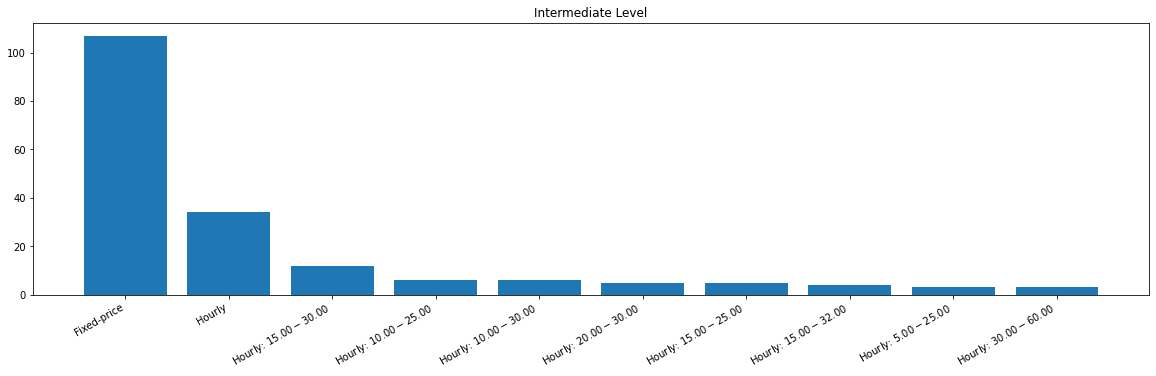

In [19]:
filt = (merge["CT"] == "Intermediate")
count_entry_level = merge.loc[filt,"JT"].value_counts()[0:10]

plt.figure(figsize=(20,5))
plt.bar(count_entry_level.index, count_entry_level.values)
plt.title("Intermediate Level")
plt.xticks(rotation="30", ha="right")
plt.show()

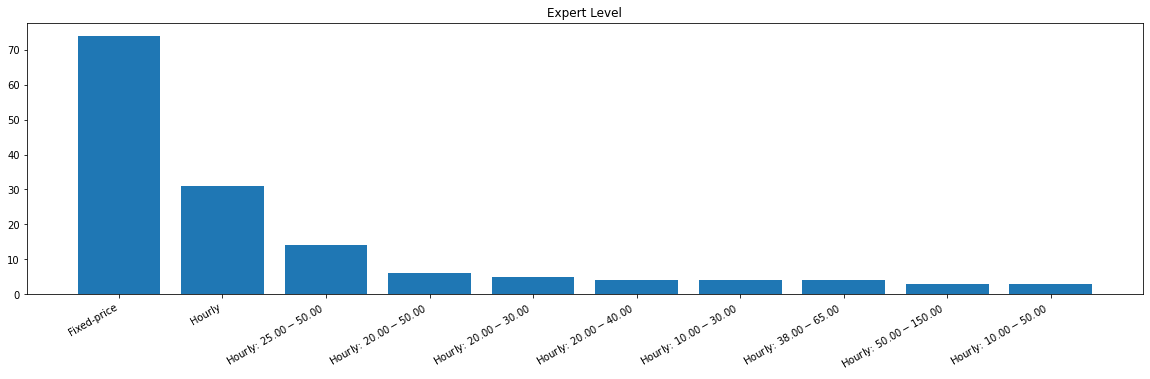

In [20]:
filt = (merge["CT"] == "Expert")
count_entry_level = merge.loc[filt,"JT"].value_counts()[0:10]

plt.figure(figsize=(20,5))
plt.bar(count_entry_level.index, count_entry_level.values)
plt.title("Expert Level")
plt.xticks(rotation="30", ha="right")
plt.show()

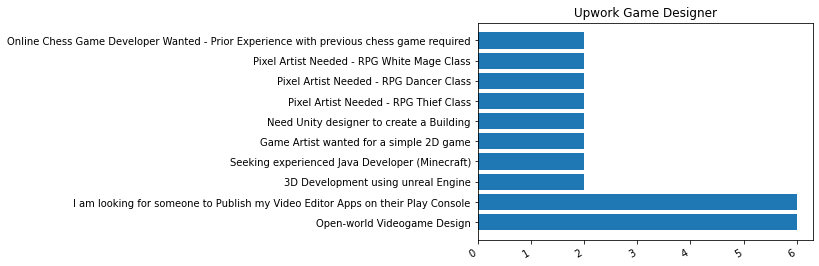

In [21]:
count_job_title = merge["Title"].value_counts()[0:10]
plt.barh(count_job_title.index, count_job_title.values)
plt.title("Upwork Game Designer")
plt.xticks(rotation="30",ha="right")
plt.show()